In [1]:
import numpy as np
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
#############load data############
data = np.loadtxt('MLWeedCropTrain.csv', delimiter=',',)
X = data[:,:-1]
X = X - np.mean(X, axis=0)
y = data[:,-1]

In [10]:
###############PCA###############
pca = PCA(svd_solver = 'full')
pca.fit(X)
print('Eigenvalues:',pca.explained_variance_) # eigenvalues for all componets
print('Explained variance ratio:',pca.explained_variance_ratio_) #Explained variance

Eigenvalues: [3.40409799e+06 1.37998456e+06 2.42564152e+05 1.18244260e+05
 4.70092000e+04 1.54582538e+04 5.56336848e+03 3.18377319e+03
 1.23984337e+03 1.00877066e+03 3.40310304e+01 2.63012185e+01
 1.13586755e-03]
Explained variance ratio: [6.52324185e-01 2.64445180e-01 4.64823465e-02 2.26590394e-02
 9.00833001e-03 2.96225104e-03 1.06610321e-03 6.10103544e-04
 2.37590050e-04 1.93309798e-04 6.52133523e-06 5.04007844e-06
 2.17665260e-10]


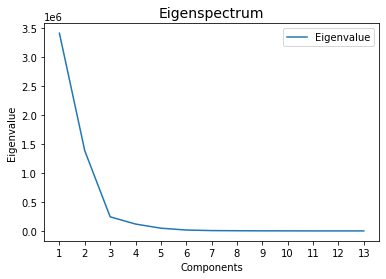

In [11]:
################plot eigenspectrum#############
components = np.arange(1, 14, 1)
fig, ax = plt.subplots()
ax.plot(components, pca.explained_variance_, label="Eigenvalue")
ax.set_xlabel('Components')
ax.set_ylabel('Eigenvalue')
plt.xticks(components)
ax.set_title('Eigenspectrum', fontsize=14, position=(0.5,1.05))
ax.legend()
fig.savefig('Assignment6_Question1_Plot0.pdf')
plt.show()

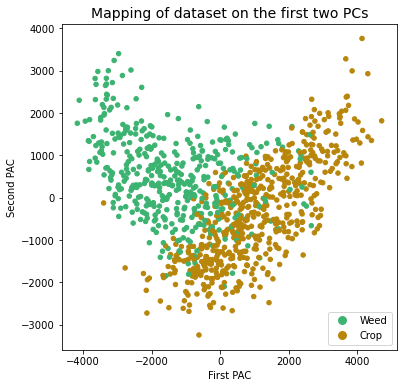

In [12]:
###############Visualize the data#################
#Eigenvectors
eigvec = pca.components_ 
# first two components
pca_1_2 = eigvec[0:2, :]
# mapping data
mapped_X = np.dot(X, pca_1_2.T)
# plot
color_dict = {1:'darkgoldenrod', 0:'mediumseagreen'}
color = [color_dict[i] for i in y]
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.scatter(mapped_X[:,0], mapped_X[:,1], marker = 'o', s = 20, c = color)
ax1.set_title('Mapping of dataset on the first two PCs', fontsize=14, position=(0.5,1.05))
ax1.set_xlabel('First PAC')
ax1.set_ylabel('Second PAC')
# set legend
legend_elements = [
        Line2D([0], [0], marker='o',color='w', label='Weed', markerfacecolor='mediumseagreen', markersize=10), 
        Line2D([0], [0], marker='o', color='w', label='Crop', markerfacecolor='darkgoldenrod', markersize=10)
        ]
ax1.legend(handles=legend_elements, loc='lower right')
fig1.savefig('Assignment6_Question1_Plot1.pdf')
plt.show()

In [33]:
##############clustering#################
cluster = KMeans(n_clusters = 2, init = X[0:2, 0:13]).fit(X)
center = np.dot(cluster.cluster_centers_, pca_1_2.T)
print('center: ', center)

center:  [[ 1583.92823848   123.83551865]
 [-1415.93584955  -110.70144849]]


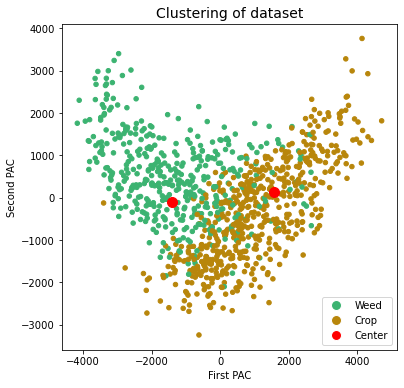

In [34]:
fig3, ax3 = plt.subplots(figsize=(6,6))
ax3.scatter(mapped_X[:,0], mapped_X[:,1], marker = 'o', s = 20, c = color)
ax3.scatter(center[:,0], center[:,1], s = 100, c = 'r', marker='o')
ax3.set_title('Clustering of dataset', fontsize=14, position=(0.5,1.05))
ax3.set_xlabel('First PAC')
ax3.set_ylabel('Second PAC')
# set legend
legend_elements = [
        Line2D([0], [0], marker='o',color='w', label='Weed', markerfacecolor='mediumseagreen', markersize=10), 
        Line2D([0], [0], marker='o', color='w', label='Crop', markerfacecolor='darkgoldenrod', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Center', markerfacecolor='r', markersize=10)]
ax3.legend(handles=legend_elements, loc='lower right')
fig3.savefig('Assignment6_Question1_Plot3.pdf')
plt.show()

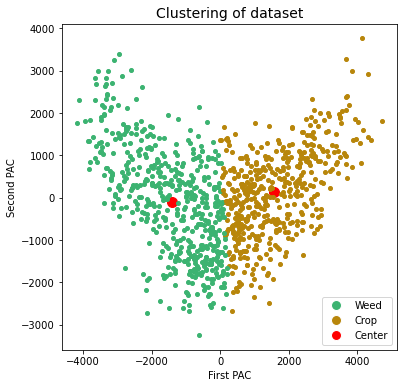

In [35]:
#################Visualize clustering###################
fig2, ax2 = plt.subplots(figsize=(6,6))
# get clustered label
label_clustered = cluster.labels_
# plot clustered data
color = ['darkgoldenrod', 'mediumseagreen']
j = 0 
for i in label_clustered:
    ax2.plot([mapped_X[j:j+1,0]], [mapped_X[j:j+1,1]], marker = 'o', c = color[i], markersize = 4)
    j +=1
# add center to plot
ax2.scatter(center[:,0], center[:,1], s = 100, c = 'r', marker='o')
ax2.set_title('Clustering of dataset', fontsize=14, position=(0.5,1.05))
ax2.set_xlabel('First PAC')
ax2.set_ylabel('Second PAC')
# set legend
legend_elements = [
        Line2D([0], [0], marker='o',color='w', label='Weed', markerfacecolor='mediumseagreen', markersize=10), 
        Line2D([0], [0], marker='o', color='w', label='Crop', markerfacecolor='darkgoldenrod', markersize=10), 
        Line2D([0], [0], marker='o', color='w', label='Center', markerfacecolor='r', markersize=10)
        ]
ax2.legend(handles=legend_elements, loc='lower right')
fig2.savefig('Assignment6_Question1_Plot2.pdf')
plt.show()